# Módulo 10 tarefa 03
Considere a mesma base de dados utilizada na tarefa 1 ```previsao_de_renda.csv```.

In [44]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
np.random.seed(2360873)

df = pd.read_csv("previsao_de_renda.csv")
df.head()

,Unnamed: 0,data_ref,index,sexo,posse_de_veiculo,posse_de_imovel,qtd_filhos,tipo_renda,educacao,estado_civil,tipo_residencia,idade,tempo_emprego,qt_pessoas_residencia,mau,renda
0,0,2015-01-01,8682,F,False,True,1,Assalariado,Secundário,Casado,Casa,36,3.575342,3.0,False,3369.24
1,1,2015-01-01,12830,M,True,True,0,Empresário,Secundário,Casado,Casa,42,0.860274,2.0,False,6096.14
2,2,2015-01-01,2885,M,True,True,2,Assalariado,Superior completo,Casado,Casa,31,8.065753,4.0,False,5658.98
3,3,2015-01-01,16168,F,True,False,0,Empresário,Secundário,Casado,Casa,50,1.208219,2.0,False,7246.69
4,4,2015-01-01,12438,M,False,False,0,Assalariado,Secundário,Casado,Casa,52,13.873973,2.0,False,4017.37


In [45]:
df.shape

(15000, 16)

1) Construa um gráfico de barras para avaliar a distribuição das variáveis qualitativas no tempo. Você acha que houve alguma alteração importante a ser investigada?

In [46]:
n_meses = 3
n_clientes = 210

datas = pd.Series(pd.date_range("2015-01-01", periods = n_meses, freq = "MS").repeat(n_clientes))

dados = df.sample(n = n_meses * n_clientes, replace = True).reset_index()

df2 = pd.concat([datas, dados], axis = 1)
df2.rename({0: "nova_data"}, inplace = True, axis = "columns")
df2

,nova_data,level_0,Unnamed: 0,data_ref,index,sexo,posse_de_veiculo,posse_de_imovel,qtd_filhos,tipo_renda,educacao,estado_civil,tipo_residencia,idade,tempo_emprego,qt_pessoas_residencia,mau,renda
0,2015-01-01,10775,10775,2015-11-01,13159,M,True,False,1,Empresário,Superior completo,Casado,Casa,44,3.838356,3.0,False,25971.93
1,2015-01-01,13028,13028,2016-02-01,737,F,False,True,1,Assalariado,Superior completo,Casado,Casa,48,19.369863,3.0,False,13398.09
2,2015-01-01,1775,1775,2015-02-01,9818,F,False,False,2,Servidor público,Secundário,Casado,Casa,28,5.430137,4.0,False,6876.78
3,2015-01-01,7614,7614,2015-08-01,10912,M,True,False,0,Empresário,Secundário,Casado,Casa,49,14.273973,2.0,False,5732.37
4,2015-01-01,3485,3485,2015-04-01,10448,F,False,True,0,Assalariado,Secundário,Viúvo,Casa,35,6.216438,1.0,False,2252.37
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
625,2015-03-01,3998,3998,2015-04-01,15535,F,False,True,0,Assalariado,Secundário,Casado,Casa,52,3.624658,2.0,False,3706.18
626,2015-03-01,6258,6258,2015-07-01,15237,F,False,True,0,Assalariado,Superior completo,Solteiro,Casa,54,7.958904,1.0,False,11575.18
627,2015-03-01,1076,1076,2015-02-01,9584,M,True,True,2,Assalariado,Secundário,Casado,Casa,29,6.934247,4.0,False,3159.27
628,2015-03-01,8120,8120,2015-09-01,2696,F,False,True,0,Empresário,Superior completo,Casado,Casa,32,5.978082,2.0,False,4473.22


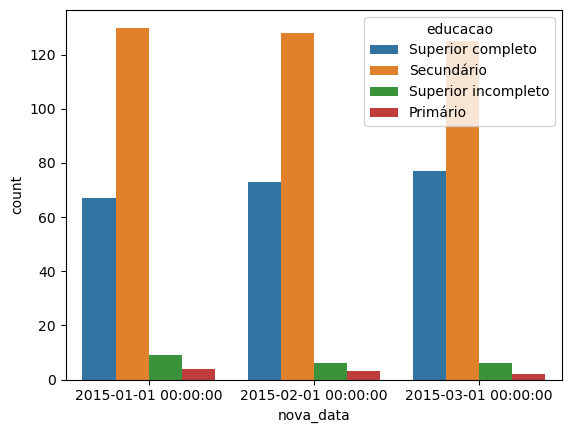

In [47]:
ax = sns.countplot(x = "nova_data", hue = "educacao", data=df2)


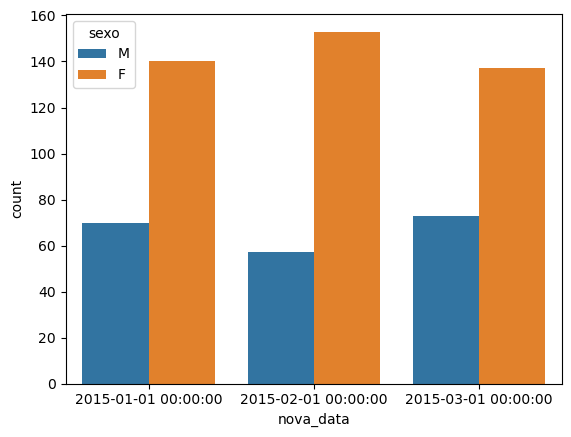

In [48]:
ax = sns.countplot(x = "nova_data", hue = "sexo", data=df2)

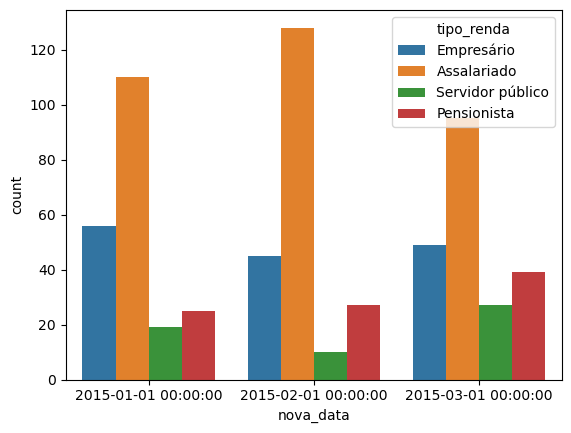

In [49]:
ax = sns.countplot(x = "nova_data", hue = "tipo_renda", data=df2)

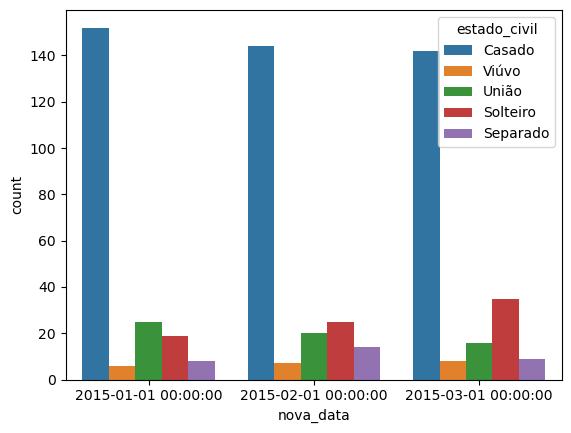

In [50]:
ax = sns.countplot(x = "nova_data", hue = "estado_civil", data=df2)

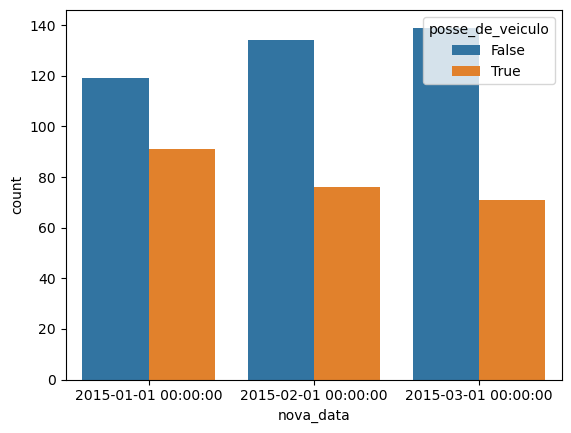

In [51]:
ax = sns.countplot(x = "nova_data", hue = "posse_de_veiculo", data=df2)

In [ ]:
print("De acordo com as variáveis analisadas, nos três primeiros meses não tivemos nenhuma mudança significantes entre elas.")

2) Para cada variável qualitativa, construa um gráfico mostrando as médias de cada nível da variável no tempo e avalie a estabilidade. Houve alguma alteração importante? Você acha que se pode utilizar essas variáveis em uma modelagem?

C:\Users\victo\anaconda3\Lib\site-packages\seaborn\algorithms.py:98: RuntimeWarning: Mean of empty slice
  boot_dist.append(f(*sample, **func_kwargs))


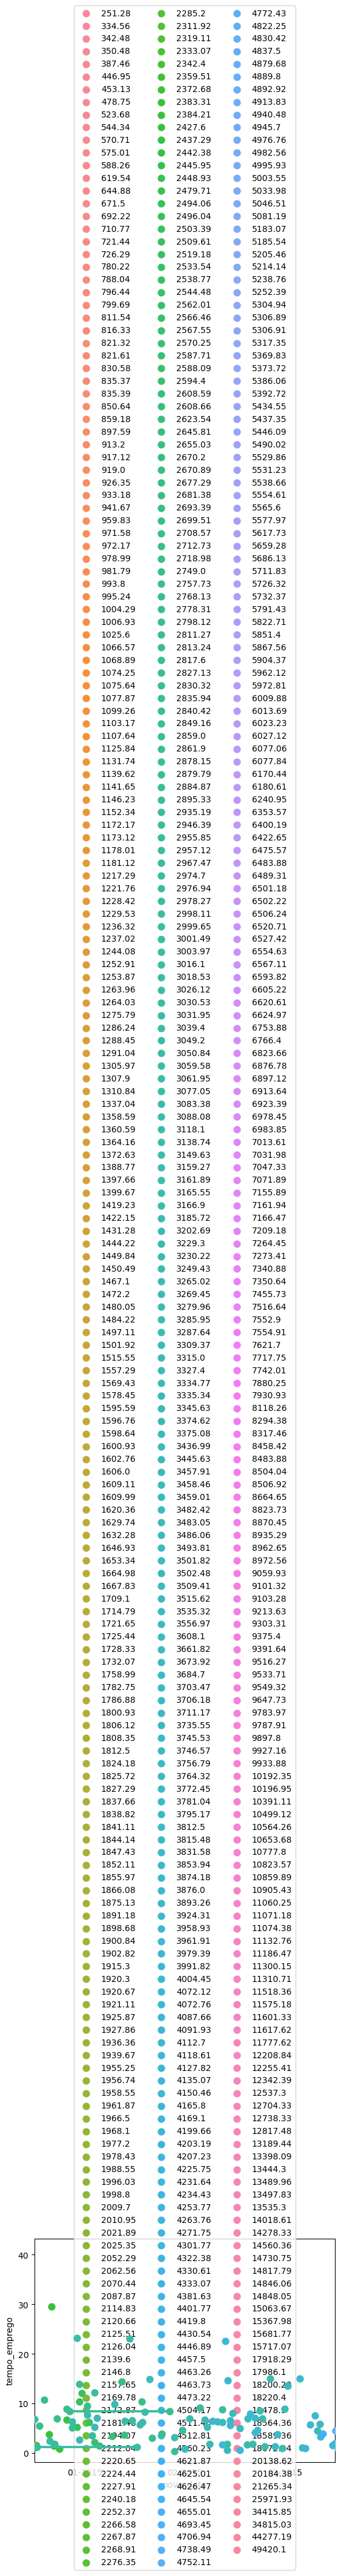

In [57]:
ax = sns.pointplot(x="nova_data", y="tempo_emprego", hue = "renda", data = df2, dodge = True, errorbar=('ci', 95))

plt.legend(loc = "lower center", bbox_to_anchor=(0.5, -.30), ncol=3)

tick_labs = df2["nova_data"].map(lambda ts: ts.strftime("%m-%Y")).unique()

ticks = ax.set_xticks(list(range(df2["nova_data"].nunique())))
labels = ax.set_xticklabels(tick_labs, rotation=0)

plt.legend(loc = "lower center", bbox_to_anchor=(0.5, -.50),ncol = 3)